# MLP(regression)

## This Notebook is for Question_1 of <a href="https://scholar.google.com/citations?user=m7xdmMgAAAAJ&hl=en"> Prof.kalhor </a> Deep learning course Tehran university

In [94]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sc 
import os 
import time 
import tensorflow as tf 
 


In [95]:
train_data = pd.read_csv("/home/alireza/Desktop/H1.csv")
test_data = pd.read_csv("/home/alireza/Desktop/H2.csv")

In [96]:
train_data# we should estimate "ADR"

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus
0,0,342,2015,July,27,1,0,0,2,0,...,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out
1,0,737,2015,July,27,1,0,0,2,0,...,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out
2,0,7,2015,July,27,1,0,1,1,0,...,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out
3,0,13,2015,July,27,1,0,1,1,0,...,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out
4,0,14,2015,July,27,1,0,2,2,0,...,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,...,A,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out
40056,0,169,2017,August,35,30,2,9,2,0,...,E,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out
40057,0,204,2017,August,35,29,4,10,2,0,...,E,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out
40058,0,211,2017,August,35,31,4,10,2,0,...,D,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out


In [97]:
# Get list of categorical variables 
s = (train_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'CustomerType', 'ReservationStatus']


In [98]:
type(object_cols) 

list

In [99]:
#finding out how many NaN values are there in each feature 
features_na = [features for features in train_data.columns if train_data[features].isnull().sum()>1]
for feature in features_na:
      print(feature, np.round(train_data[feature].isnull().mean(), 4),'%') 
        


Country 0.0116 %


In [100]:
num_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
print('No. of Numerical variables:', len(num_features)) 

No. of Numerical variables: 18


### remove Nan in our dataset ###

In [101]:
train_data.isna().sum() 
# you can see country is just have "NaN"!!

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialRequests           0
ReservationStatus                0
dtype: int64

In [102]:
train_data["Country"]

0        PRT
1        PRT
2        GBR
3        GBR
4        GBR
        ... 
40055    GBR
40056    IRL
40057    IRL
40058    GBR
40059    DEU
Name: Country, Length: 40060, dtype: object

In [103]:
train_data = train_data.dropna() 
# Drop Nan in Country columns 
test_data  = test_data.dropna()

In [104]:
train_data.isna().sum() 


IsCanceled                     0
LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
dtype: int64

In [105]:
y_train = train_data['ADR'].values.reshape(-1,1)
y_test = test_data['ADR'].values.reshape(-1,1)

# Normalization #

In [106]:
min = np.min(y_train,axis=0)
max = np.max(y_train,axis=0)
y_train = (y_train-min)/(max-min)
y_test = (y_test-min)/(max-min)


# better approach for determine categorical data #

In [107]:
train_data = train_data.drop(['ADR'], axis=1)
test_data = test_data.drop(['ADR'], axis=1)

train_data_cat = train_data.select_dtypes(include=['object'])
train_data_num = train_data.select_dtypes(exclude=['object'])

test_data_cat = test_data.select_dtypes(include=['object'])
test_data_num = test_data.select_dtypes(exclude=['object'])

# Encodeing categorical features

In [108]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
enc.fit(np.concatenate((train_data_cat,test_data_cat),axis=0))
train_data_cat = enc.transform(train_data_cat)
test_data_cat = enc.transform(test_data_cat)

# Normalizing test & train

In [109]:
x_train = np.concatenate((train_data_num, train_data_cat), axis=1)
x_test = np.concatenate((test_data_num, test_data_cat), axis=1)
min2 = np.min(x_train,axis=0).reshape(1,27)
max2 = np.max(x_train,axis=0).reshape(1,27)
x_train = (x_train-min2)/(max2-min2)
x_test = (x_test-min2)/(max2-min2)

# review of concatenate for axis =0,1

In [110]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]]) 
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

# Model ( keras,MLP)

In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(27,input_dim=27,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,kernel_initializer='normal',activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=30,batch_size=64)

Epoch 1/30
495/495 [==============================] - 1s 1ms/step - loss: 0.0100 - mae: 0.0748 - val_loss: 0.0095 - val_mae: 0.0676
Epoch 2/30
495/495 [==============================] - 1s 1ms/step - loss: 0.0054 - mae: 0.0528 - val_loss: 0.0045 - val_mae: 0.0473
Epoch 3/30
495/495 [==============================] - 1s 1ms/step - loss: 0.0043 - mae: 0.0456 - val_loss: 0.0036 - val_mae: 0.0424
Epoch 4/30
495/495 [==============================] - 1s 1ms/step - loss: 0.0040 - mae: 0.0434 - val_loss: 0.0037 - val_mae: 0.0430
Epoch 5/30
495/495 [==============================] - 1s 1ms/step - loss: 0.0038 - mae: 0.0420 - val_loss: 0.0034 - val_mae: 0.0406
Epoch 6/30
495/495 [==============================] - 1s 1ms/step - loss: 0.0036 - mae: 0.0410 - val_loss: 0.0036 - val_mae: 0.0426
Epoch 7/30
495/495 [==============================] - 1s 1ms/step - loss: 0.0035 - mae: 0.0402 - val_loss: 0.0032 - val_mae: 0.0392
Epoch 8/30
495/495 [==============================] - 1s 1ms/step - loss: 0.

# Plot

2479/2479 [==============================] - 1s 559us/step - loss: 0.0099 - mae: 0.0761


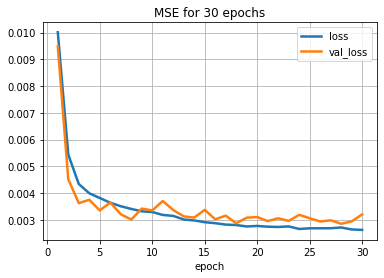

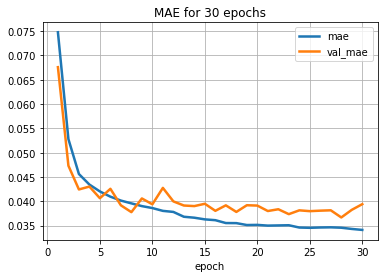

In [115]:
import matplotlib.pyplot as plt
model.evaluate(x_test,y_test)
plt.plot(np.arange(1,31),history.history['loss']
         ,label = 'loss',lw=2.5)
plt.plot(np.arange(1,31),history.history['val_loss'],
         label = 'val_loss',lw=2.5)
plt.xlabel('epoch')
plt.title('MSE for 30 epochs')
plt.legend()
plt.grid()
plt.figure()
plt.plot(np.arange(1,31),history.history['mae']
         ,label = 'mae',lw=2.5)
plt.plot(np.arange(1,31),history.history['val_mae'],
         label = 'val_mae',lw=2.5)
plt.xlabel('epoch')
plt.title('MAE for 30 epochs')
plt.legend()
plt.grid()